In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/github-dataset/repository_data.csv
/kaggle/input/github-dataset/github_dataset.csv


查看数据集中的属性名称

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load data set.
github_data = pd.read_csv('/kaggle/input/github-dataset/github_dataset.csv')

# Check the columns.
github_data.columns

Index(['repositories', 'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors', 'language'],
      dtype='object')

先查看一下数据类型和缺失率。目前有五个数值属性和两个标称属性

In [3]:
cols, dtype, specimens, num_unique, null_share = [], [], [], [], []

# mov_data['id'] = github_data['id'].astype(str)

for column in github_data:
    cols.append(column)
    col_dtype = github_data[column].dtype
    dtype.append(col_dtype)

    specimen = github_data.loc[github_data[column].first_valid_index(), column]
    specimens.append(specimen)

    num_unique.append(github_data[column].nunique())

    null_sum = github_data[column].isna().sum()
    null_to_len = null_sum / len(github_data[column])
    null_share.append(f'{null_to_len:.2%}')

df = pd.DataFrame(list(zip(dtype, specimens, num_unique, null_share)), index=cols)    
df.columns=['dtype', 'eg.', 'num_unique', 'null_share']

print(df)

                dtype                  eg.  num_unique null_share
repositories   object  octocat/Hello-World         972      0.00%
stars_count     int64                    0         249      0.00%
forks_count     int64                    0         200      0.00%
issues_count    int64                  612          66      0.00%
pull_requests   int64                  316          40      0.00%
contributors    int64                    2          67      0.00%
language       object                  C++          51     13.78%


# 标称属性的频数统计

统计repositories和language的频数

In [4]:
github_data['repositories'].value_counts()

repositories
kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: count, Length: 972, dtype: int64

In [5]:
github_data['language'].value_counts()

language
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
CoffeeScript          3
Perl                  3
Dockerfile            3
Solidity              3
AutoHotkey            3
Hack                  2
Pawn                  2
CodeQL                2
PowerShell            2
Assembly              2
Vim Script            2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML                   1
ActionS

# 数值属性统计

In [6]:
# 对stars_count forks_count issues_count pull_requests contributors进行数值属性分析
numeric_github_data = pd.DataFrame(github_data, columns=['stars_count', 'forks_count', 'issues_count','pull_requests','contributors'])
five_des = numeric_github_data.describe().loc[['max', '75%', '50%', '25%', 'min']]

NaN_counts = numeric_github_data.isna().sum()
NaN_counts = pd.DataFrame(NaN_counts, columns=['NaN_counts']).T

print(pd.concat([five_des,NaN_counts],axis=0))

            stars_count  forks_count  issues_count  pull_requests  \
max              995.00       973.00         612.0          567.0   
75%               65.25        38.25           6.0            2.0   
50%               12.00         6.00           2.0            0.0   
25%                1.00         1.00           1.0            0.0   
min                0.00         0.00           1.0            0.0   
NaN_counts         0.00         0.00           0.0            0.0   

            contributors  
max                658.0  
75%                  4.0  
50%                  2.0  
25%                  0.0  
min                  0.0  
NaN_counts           0.0  


# 数据可视化

对于数值属性，使用箱型图；对于标称属性，使用柱状图。

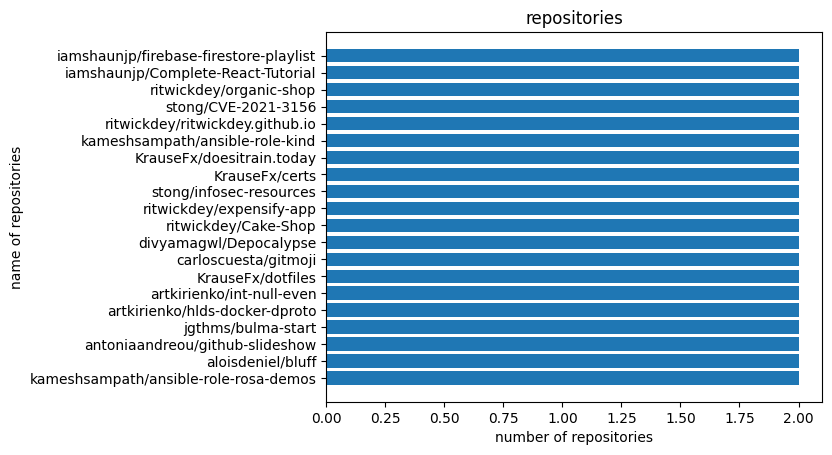

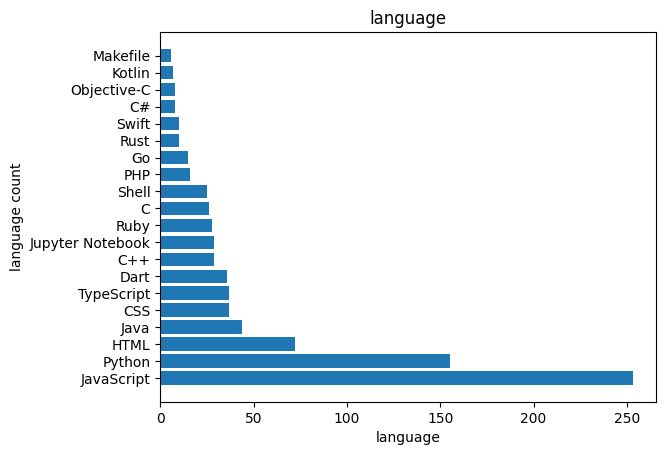

In [7]:
import matplotlib.pyplot as plt
def draw_barh(col_name,ylabel,xlabel,title,limit=None):
    github_data[col_name].value_counts()
    appropriate_count = pd.DataFrame(github_data[col_name].value_counts()).rename\
    (columns={col_name: 'a_count'})
    appropriate_count.columns.values
    
    if(limit!=None):
        plt.barh(appropriate_count.index[0:limit], appropriate_count['count'][0:limit])
    else:
        plt.barh(appropriate_count.index, appropriate_count['count'])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()
    
draw_barh('repositories','name of repositories','number of repositories','repositories',20)
draw_barh('language','language count','language','language',20)
# draw_barh('title','title count','title','title',20)
# draw_barh('storyline','storyline count','storyline','storyline',20)
# draw_barh('language','language count','language','language',20)
# draw_barh('industry','industry count','industry','industry')
# draw_barh('posted_date','posted_date count','posted_date','posted_date',20)
# draw_barh('release_date','release_date count','release_date','release_date',20)
# draw_barh('director','director count','director','director',20)
# draw_barh('writer','writer count','writer','writer',20)

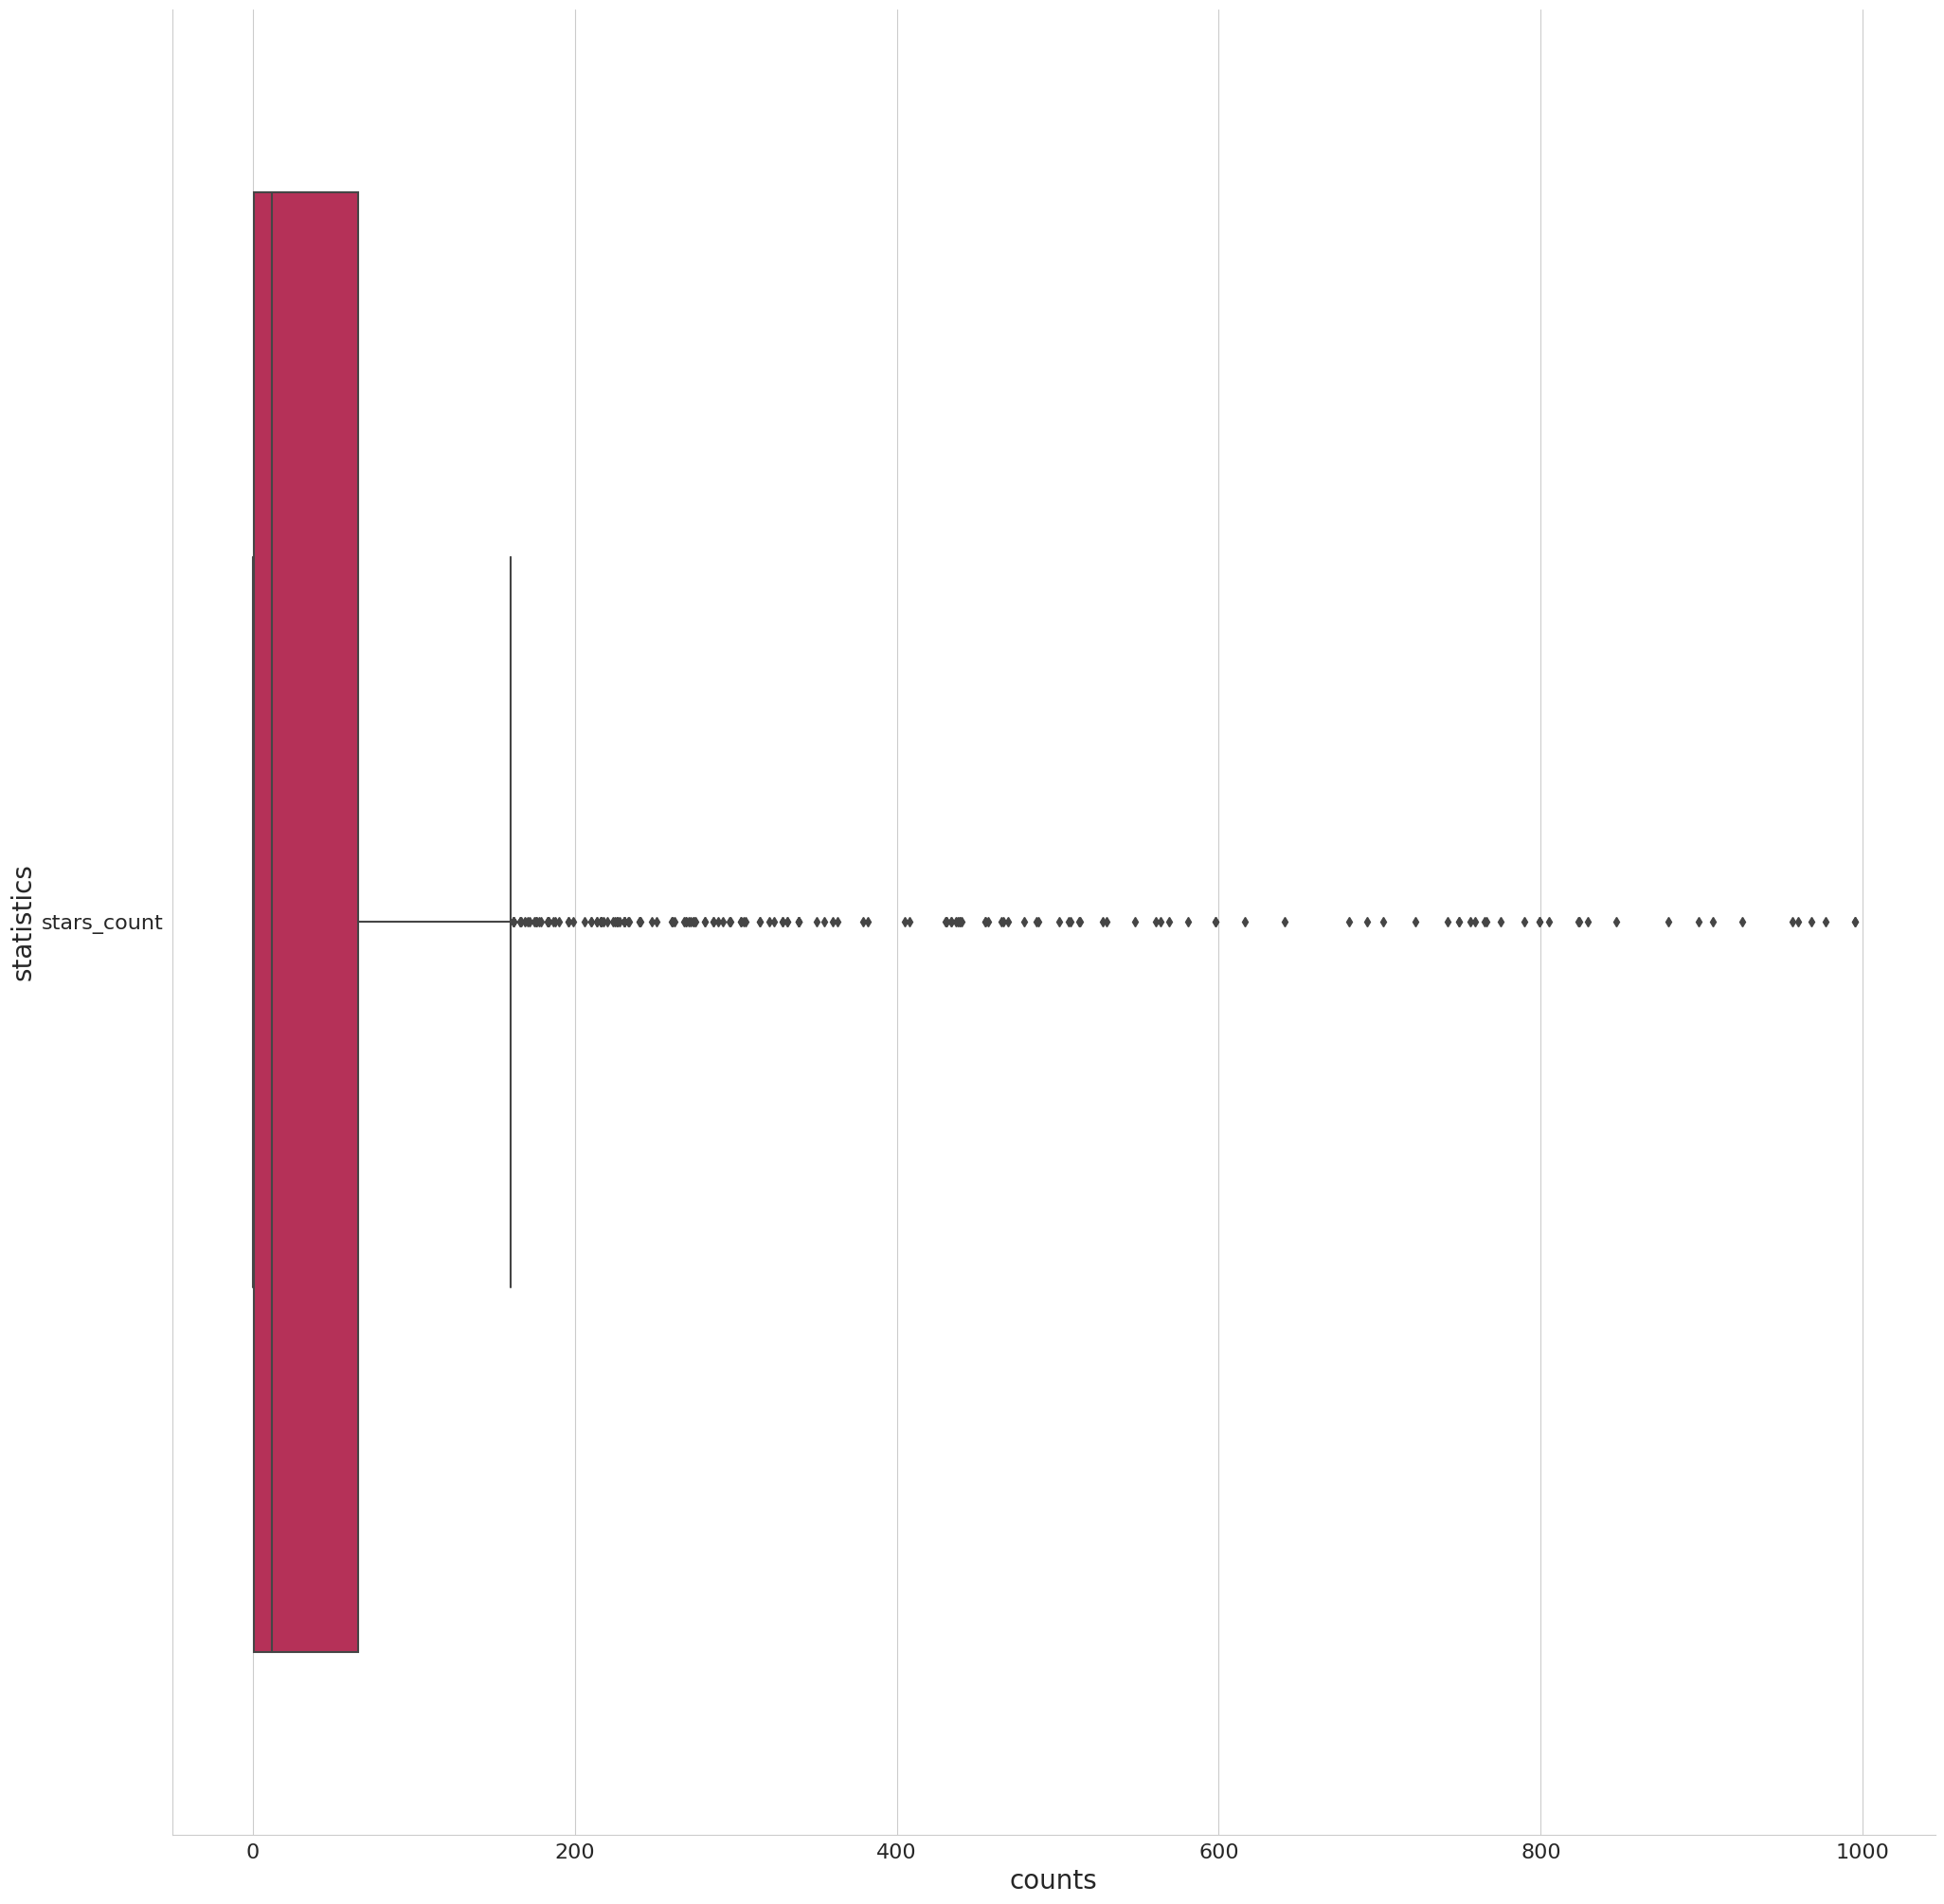

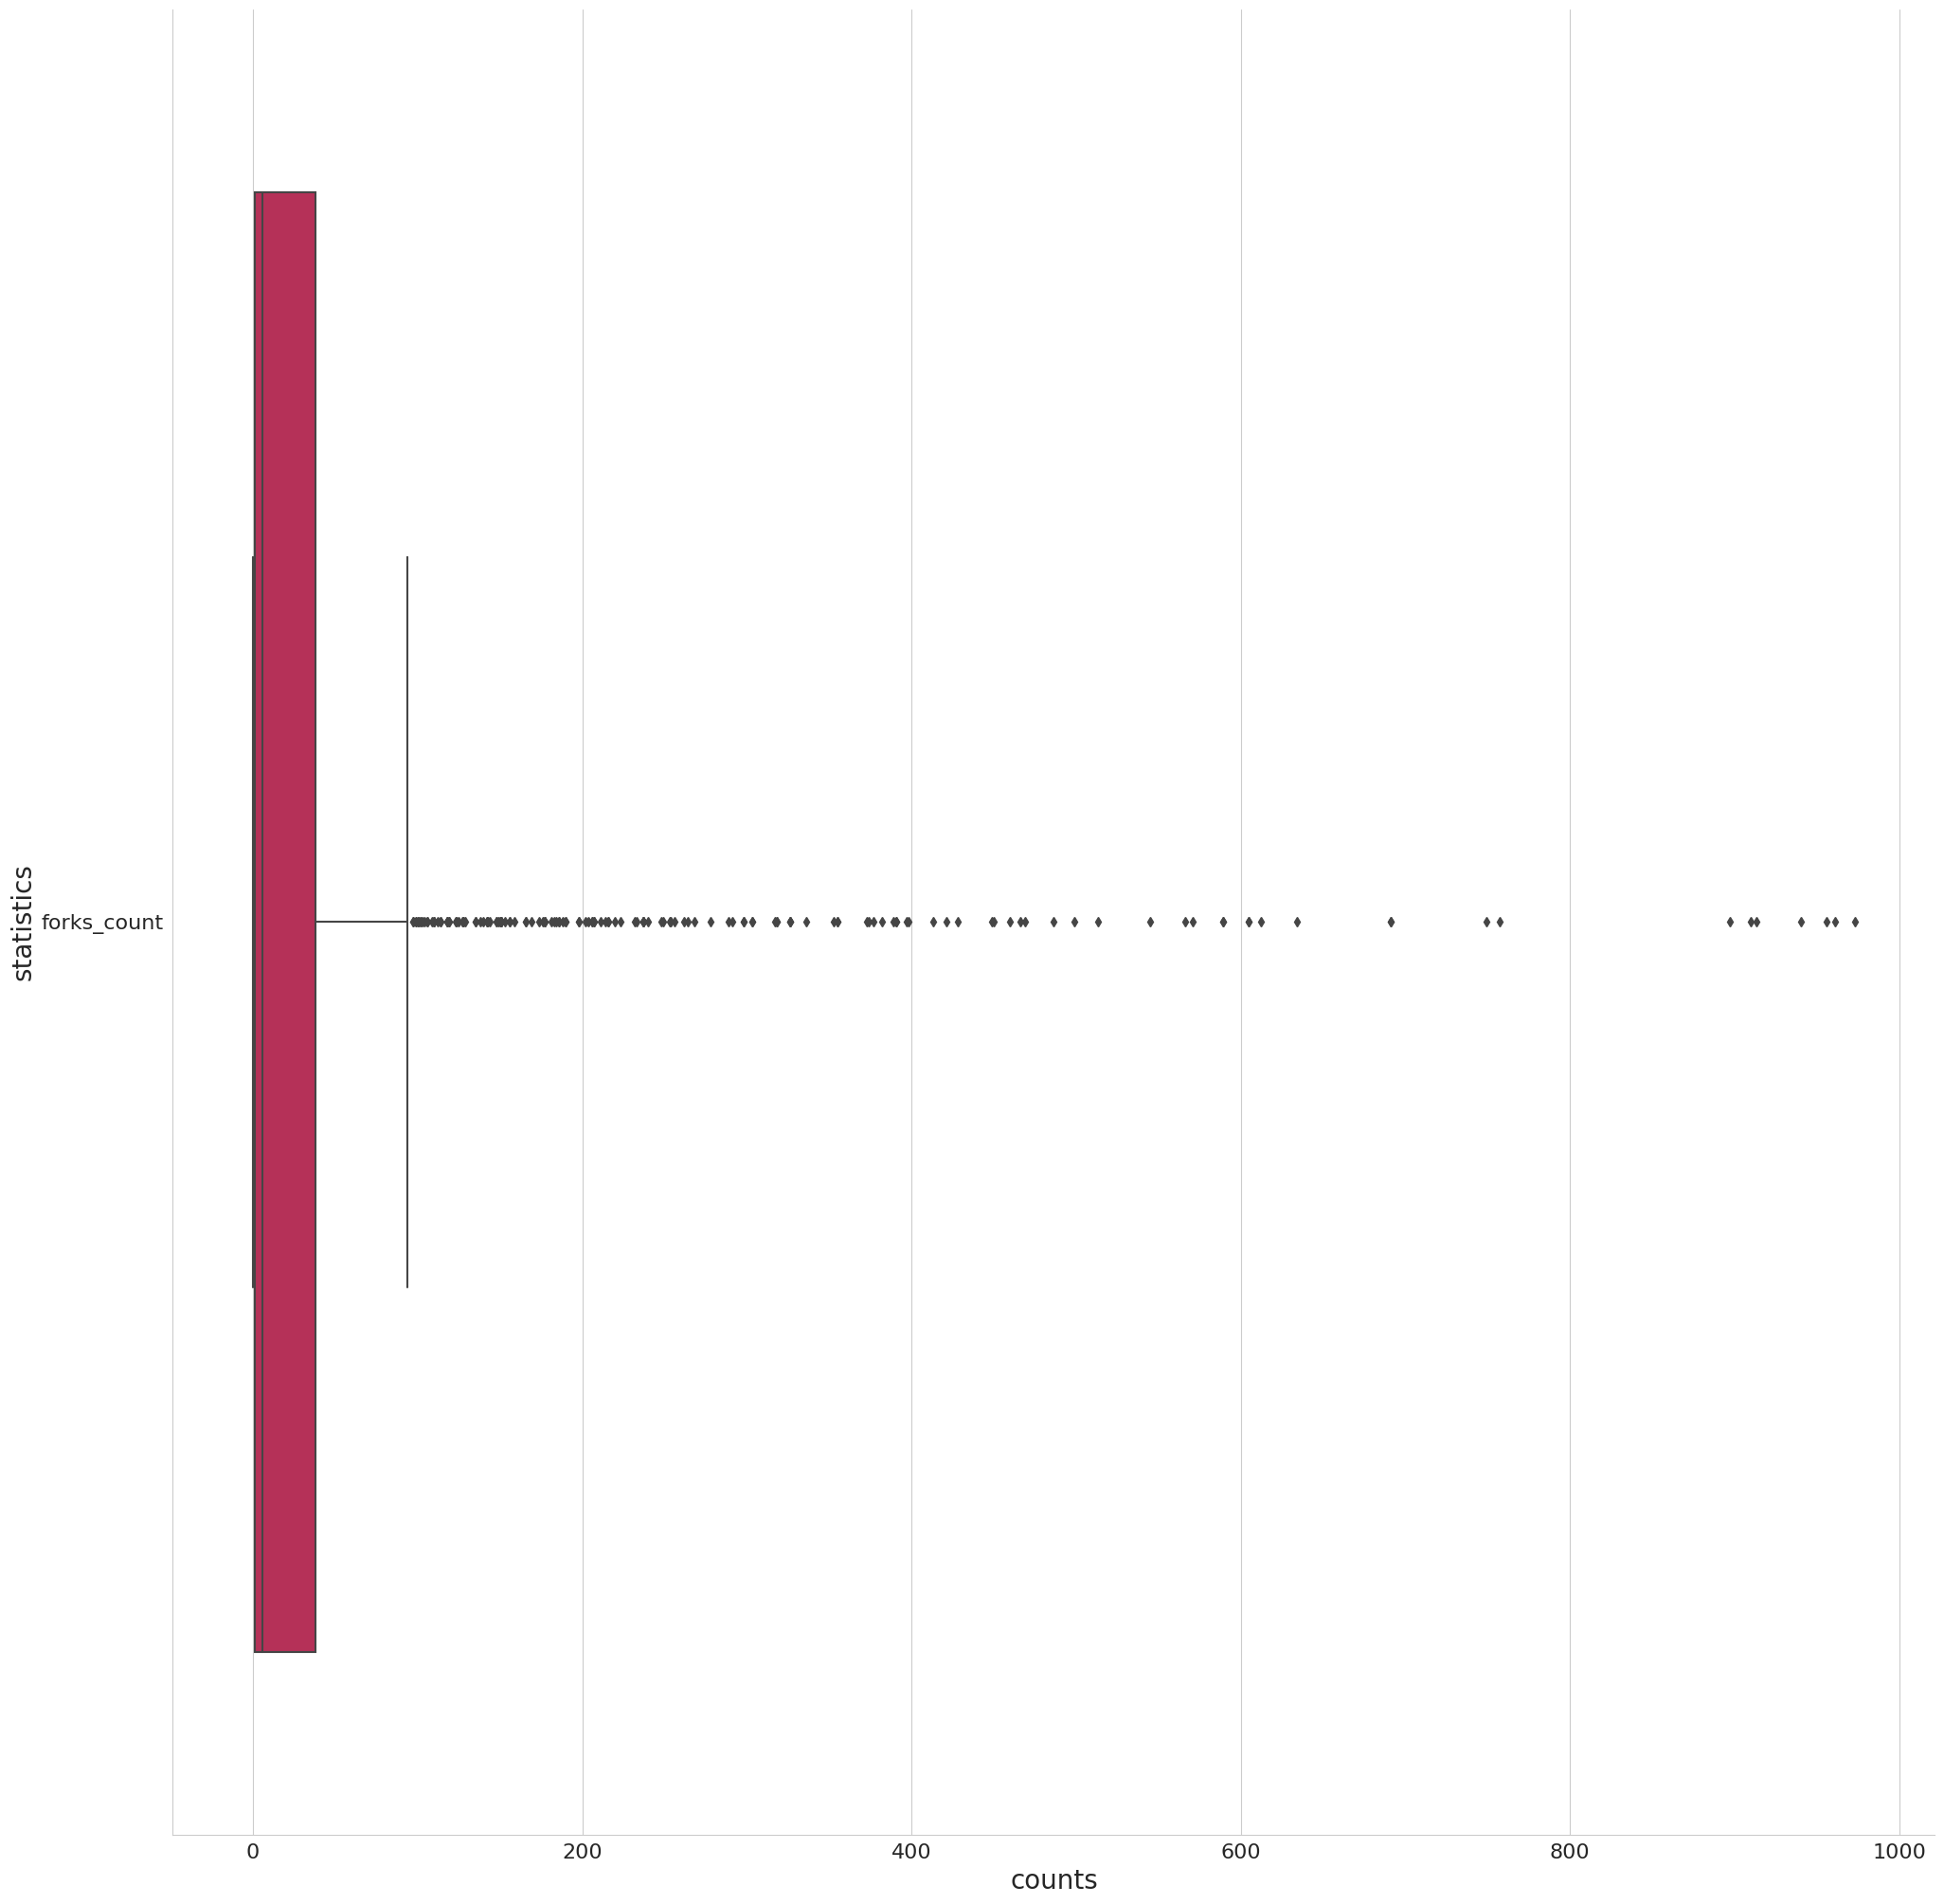

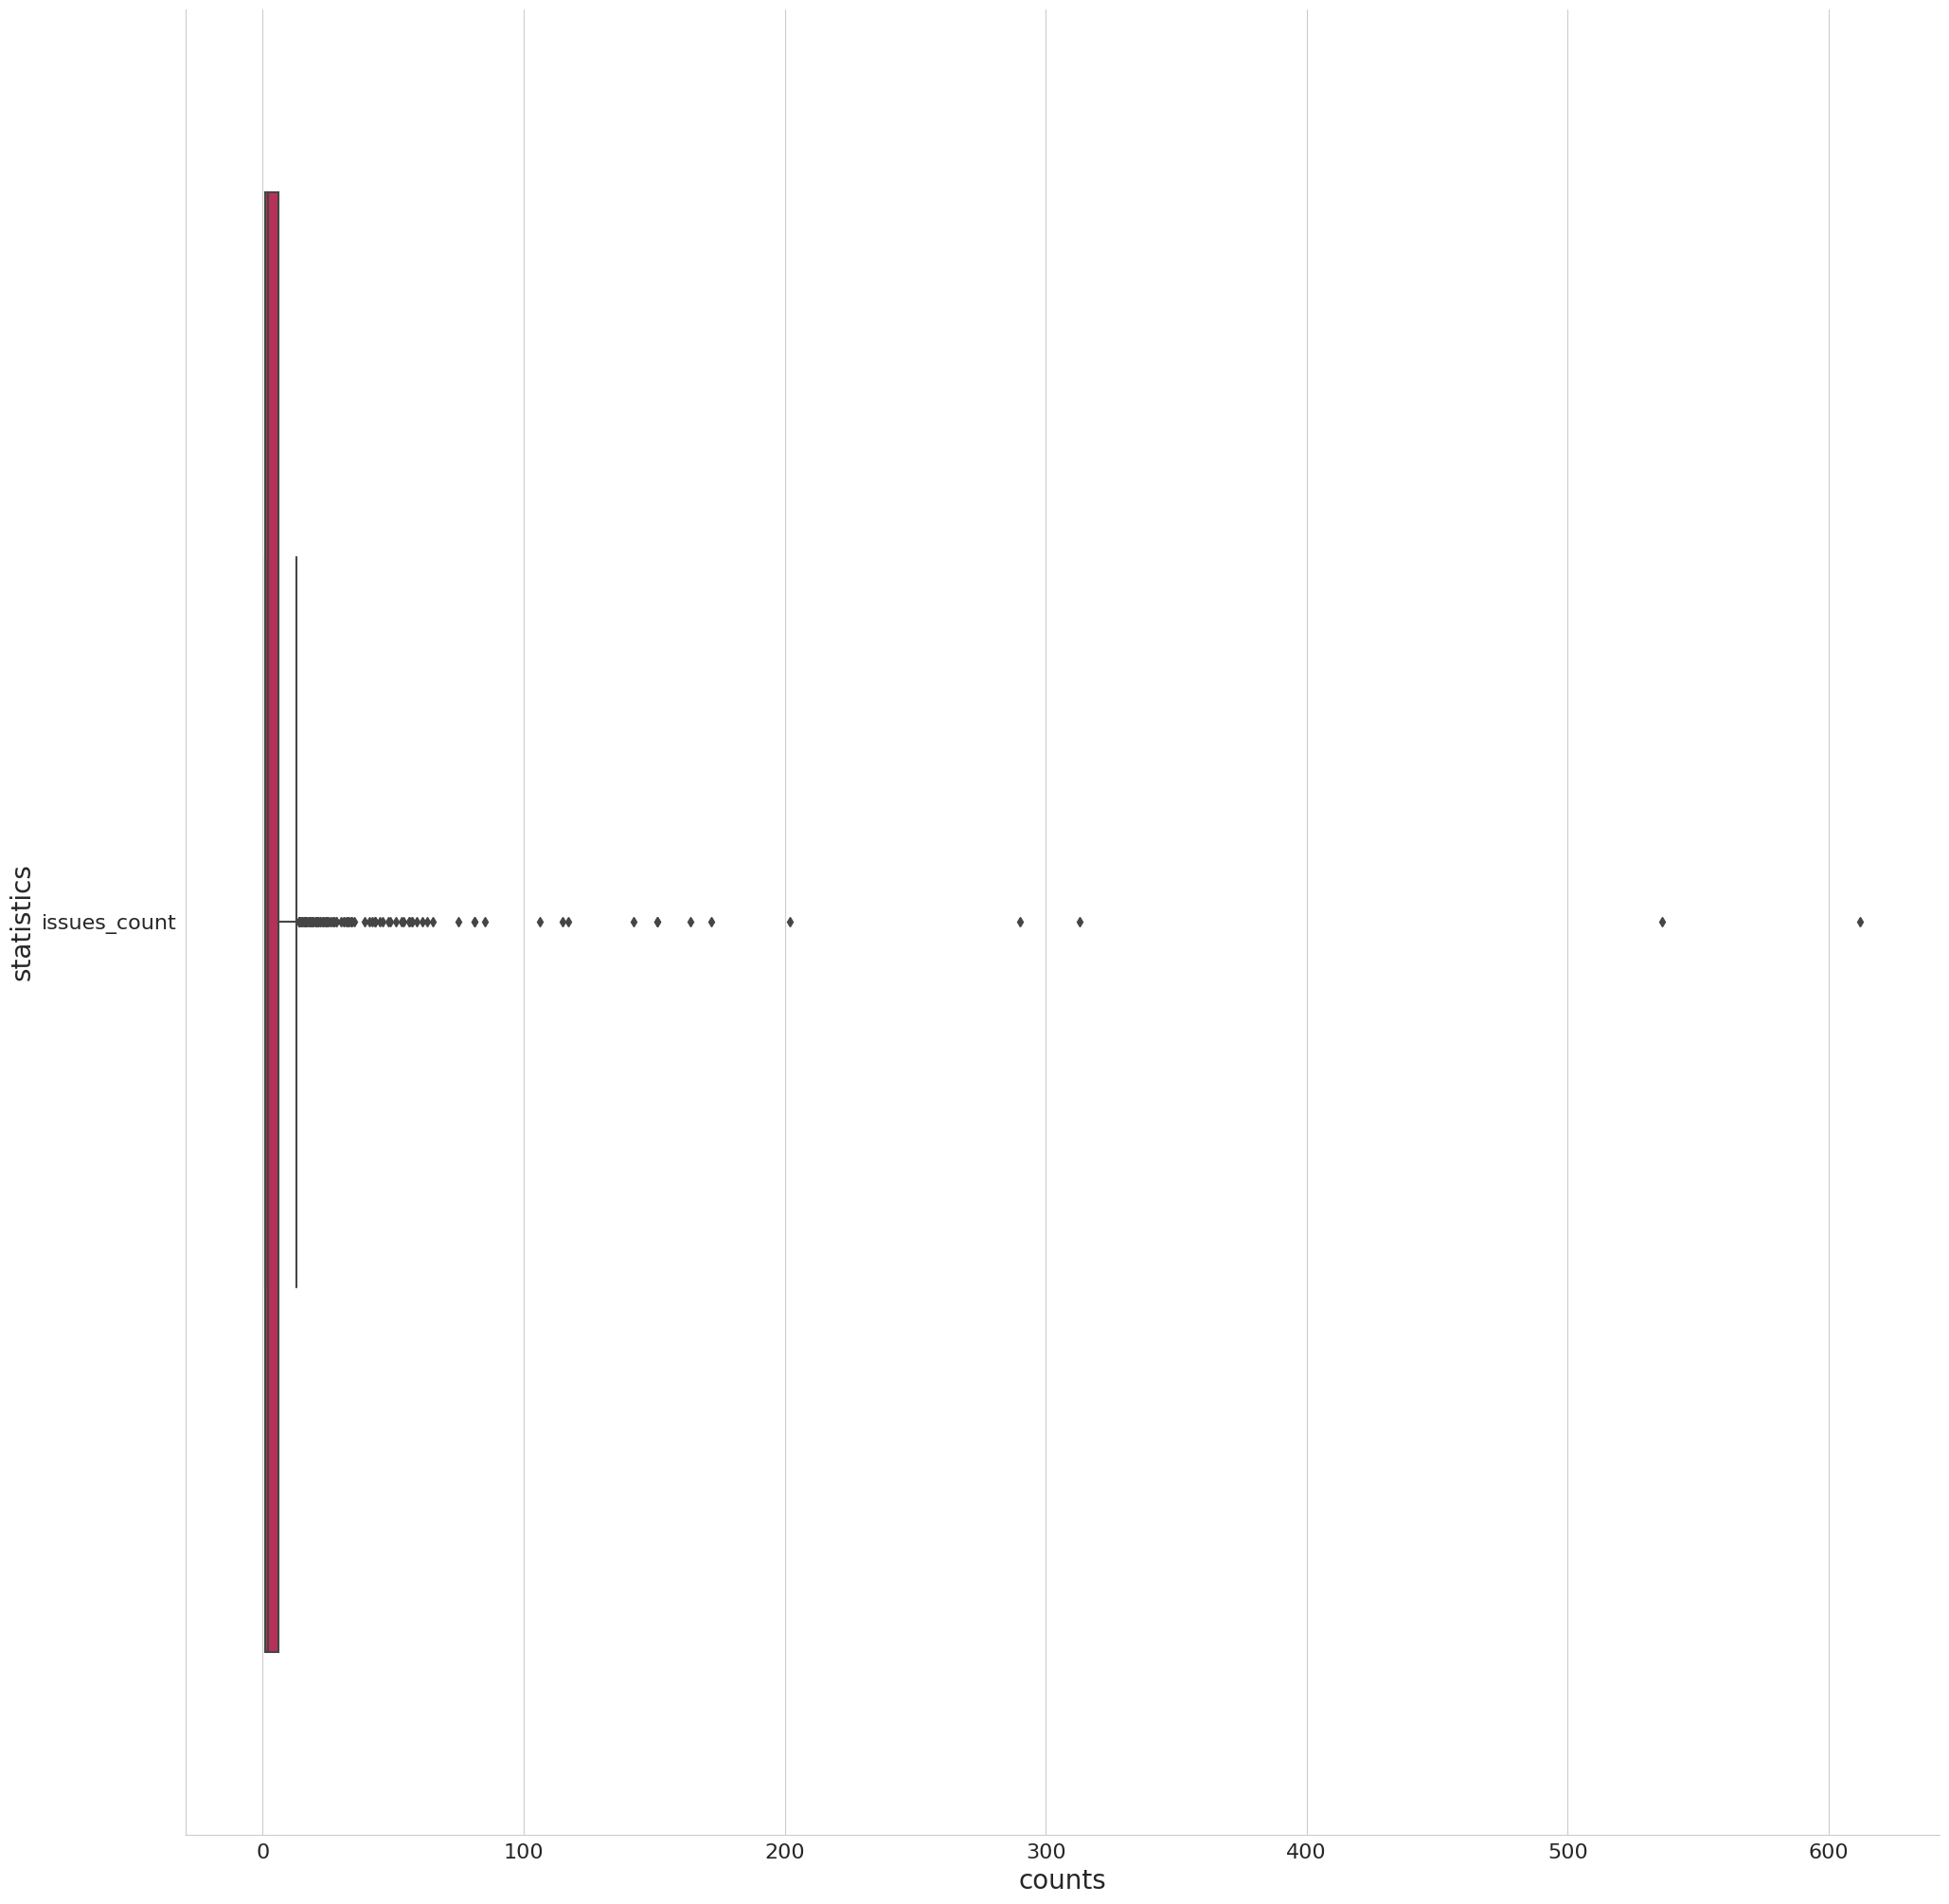

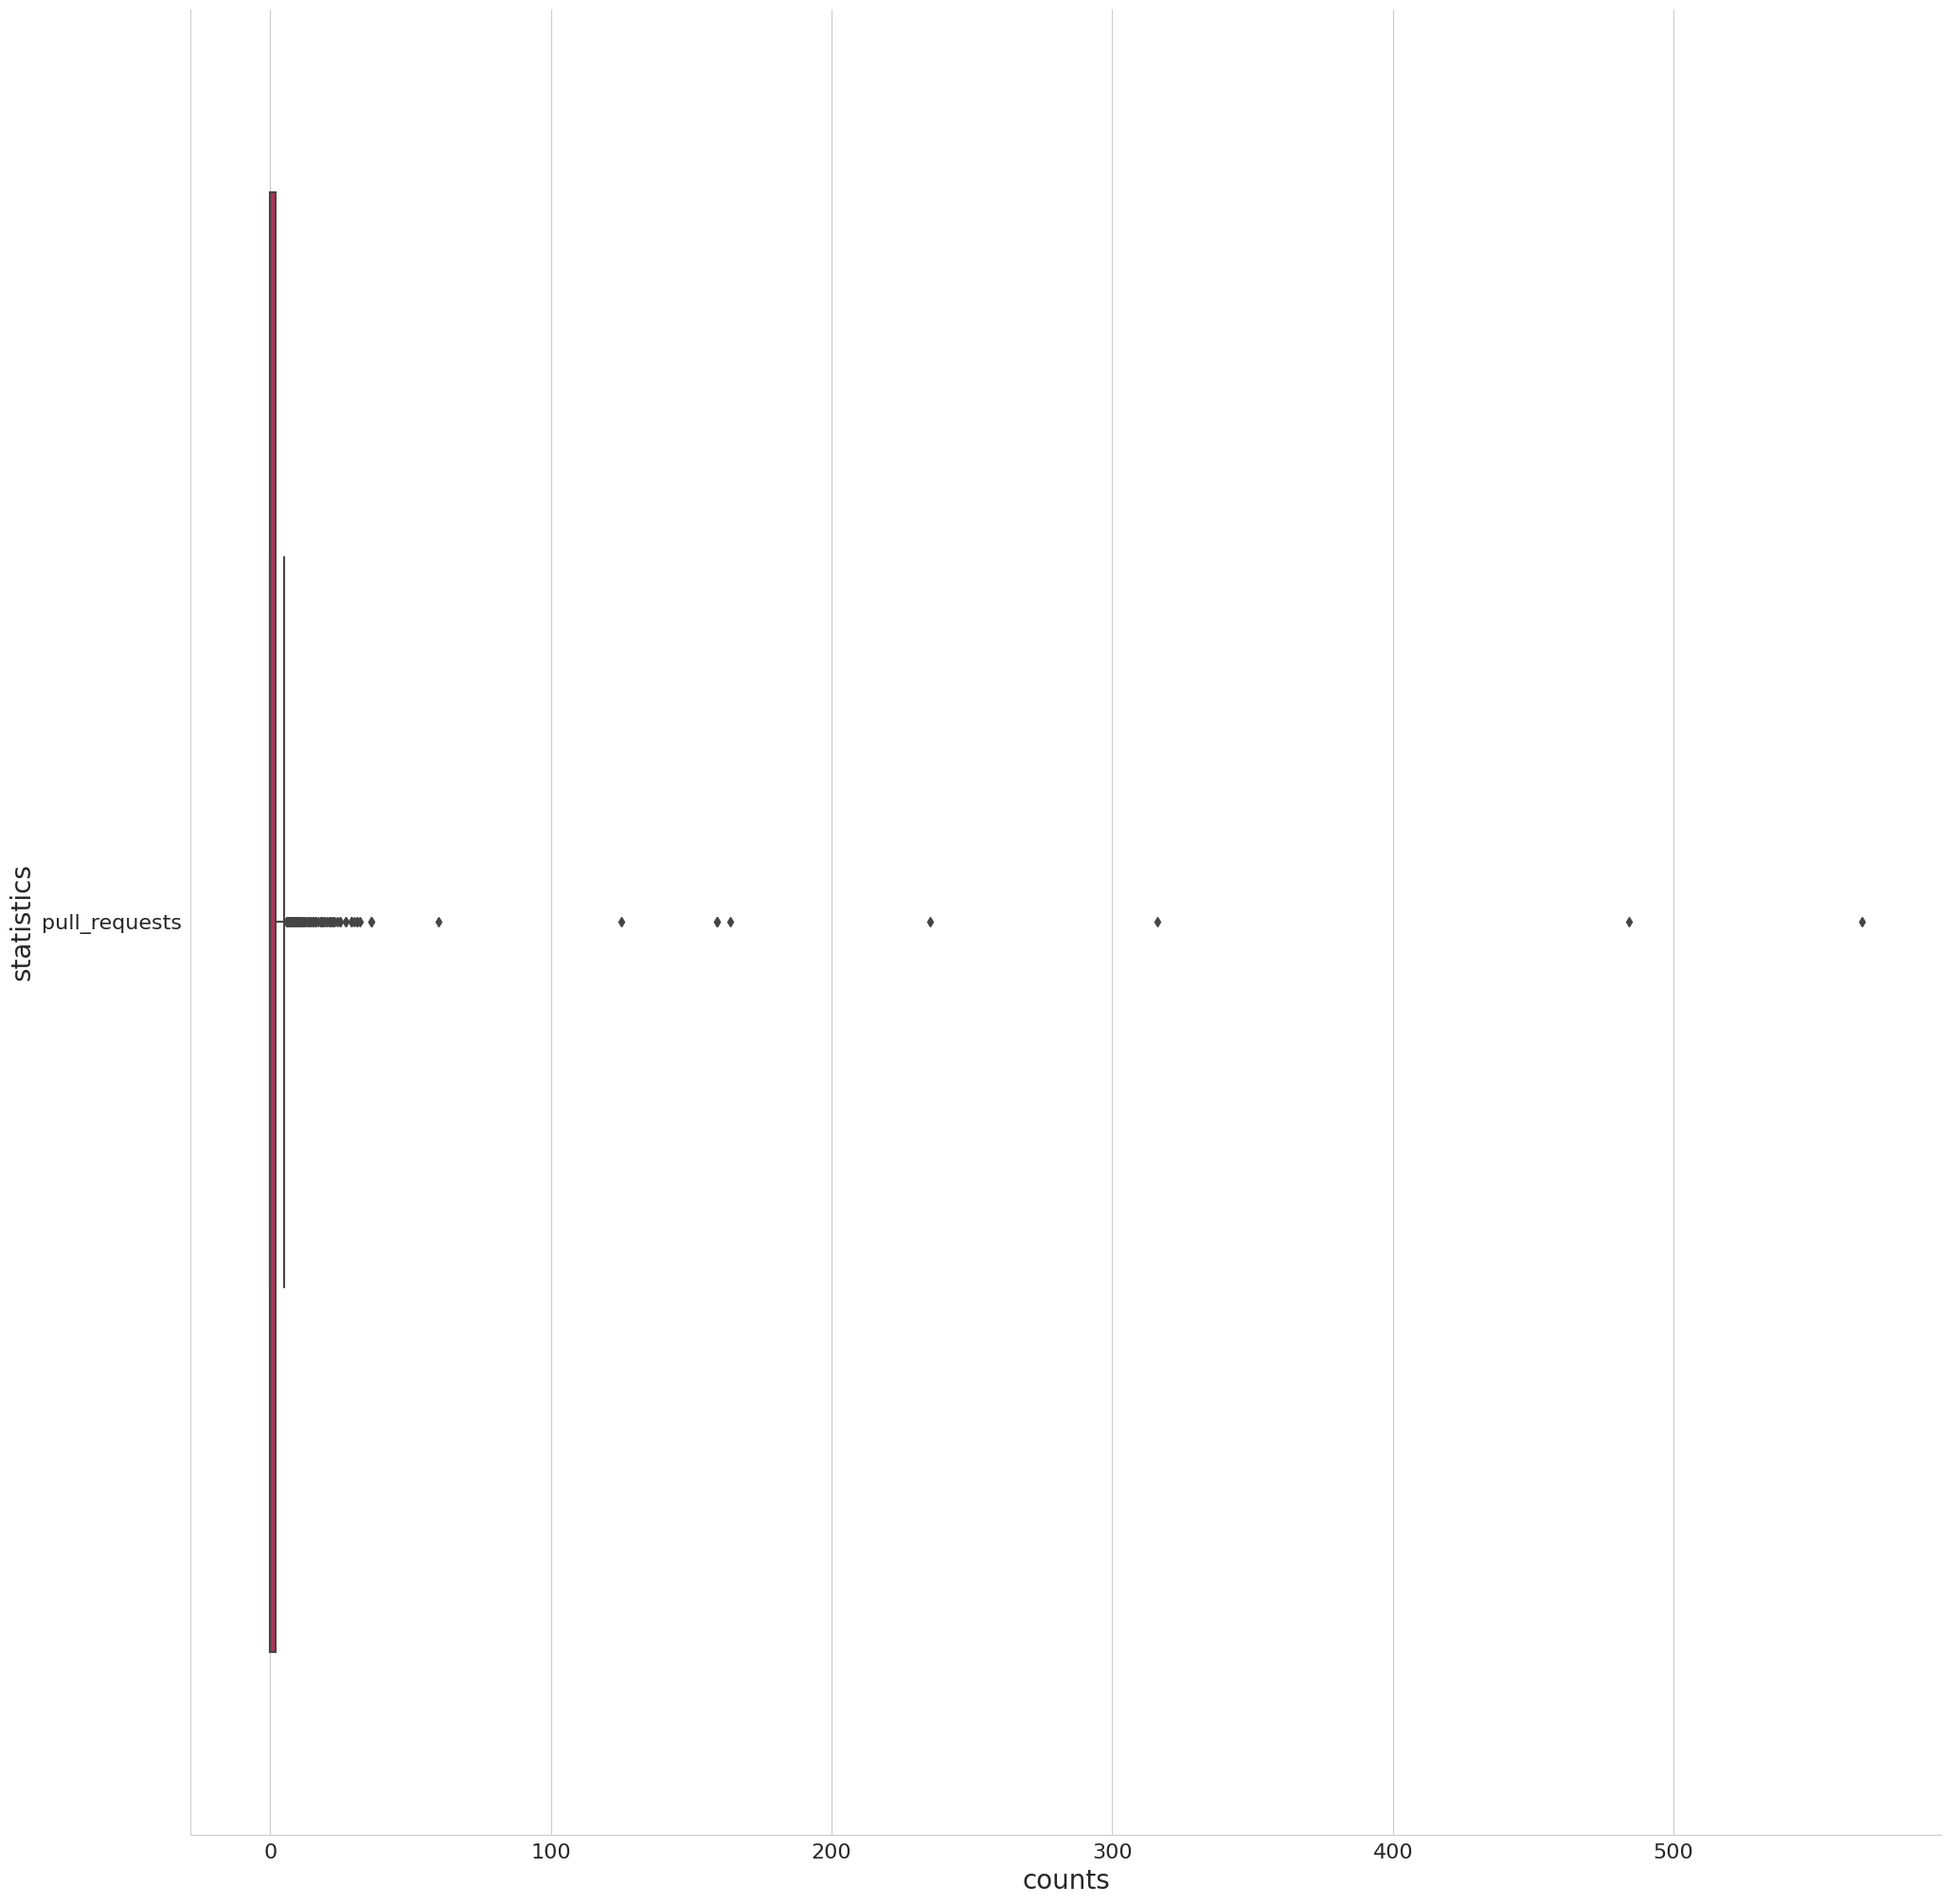

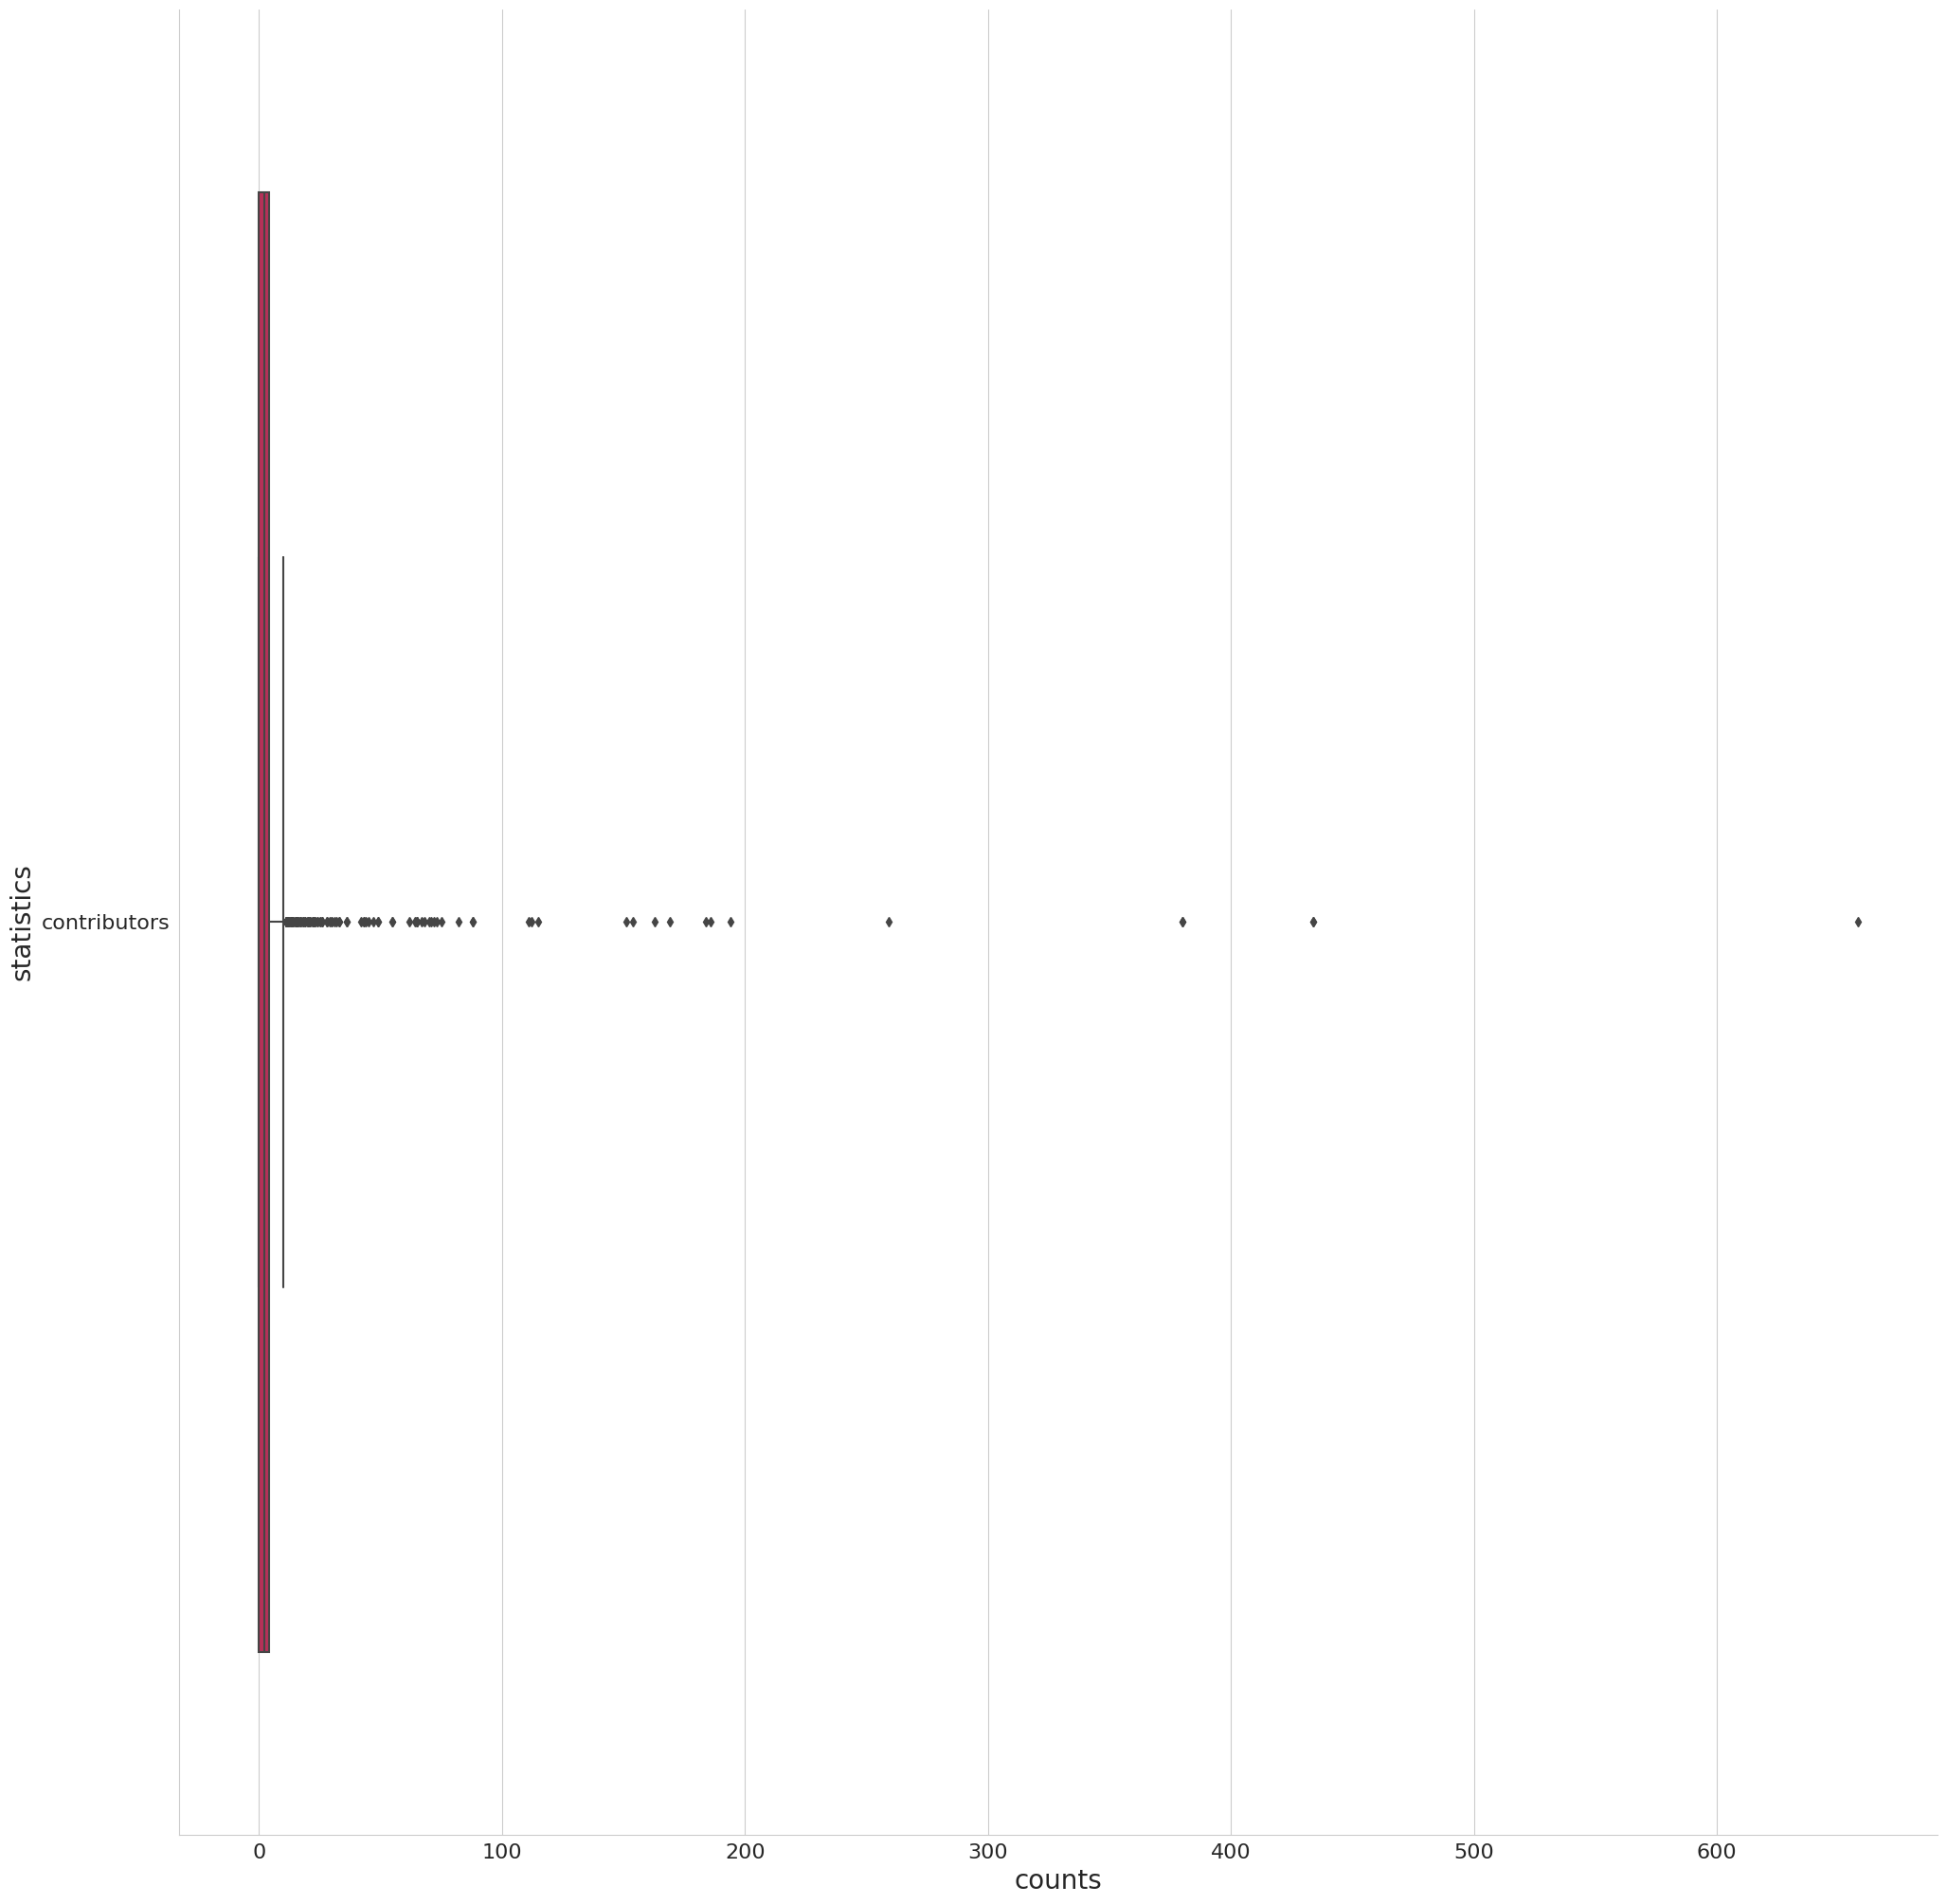

In [8]:
import seaborn as sns

for i in ['stars_count', 'forks_count', 'issues_count','pull_requests','contributors']:
    t_counts = pd.DataFrame(list(github_data[i]), columns=['counts'])
    t_counts = pd.DataFrame(t_counts, columns=['statistics', 'counts'])
    t_counts['statistics'] = i
    
    sns.set_style("whitegrid")
    operations_count_box = sns.catplot(data=t_counts, kind='box', y='statistics', x='counts', height=20, palette='rocket')
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.ylabel('statistics', fontsize=20)
    plt.xlabel('counts', fontsize=20)
    plt.show()

# 缺失值处理

在整个数据集中仅有language属性存在空值，以下所有操作都针对language属性进行。

通过去除缺失值的方式处理，处理完毕后比较原数据集和现在数据集中forks_count的区别：

In [9]:
from numpy import nan as NA

# github_data['language']
github_data_cleaned = github_data.dropna()

data_cleaned = pd.DataFrame(github_data['language'].value_counts())
# appropriate_count = pd.DataFrame(github_data['language'].value_counts())
# github_data_cleaned['language'].count()

numeric_github_data_cleaned = pd.DataFrame(github_data_cleaned, columns=['stars_count', 'forks_count'])
five_des_cleaned = numeric_github_data_cleaned.describe().loc[['max', '75%', '50%', '25%', 'min']].rename(columns={'stars_count':'stars_cleaned','forks_count':'forks_cleaned'})

numeric_github_data = pd.DataFrame(github_data, columns=['stars_count', 'forks_count'])
five_des = numeric_github_data.describe().loc[['max', '75%', '50%', '25%', 'min']].rename(columns={'stars_count':'stars_original','forks_count':'forks_original'})

print(pd.concat([five_des,five_des_cleaned],axis=1))


# appropriate_count.sort_values(by='count',ascending=False)

# appropriate_count_cleaned =  pd.DataFrame(github_data_cleaned['language'].value_counts())
# pd.concat([appropriate_count_cleaned,appropriate_count],axis=1)

# appropriate_count_cleaned['appropriate_count_cleaned'] = [0] * len(appropriate_count)

# for level in list(appropriate_count.index):
#     if level in list(mov_data_cleaned['appropriate_for'].value_counts().index):
#         appropriate_count_cleaned.loc[[level], ['appropriate_count_cleaned']] = \
#         mov_data_cleaned['appropriate_for'].value_counts().loc[[level]].values[0]

# appropriate_count_cleaned

     stars_original  forks_original  stars_cleaned  forks_cleaned
max          995.00          973.00          977.0          973.0
75%           65.25           38.25           60.0           35.0
50%           12.00            6.00           11.0            6.0
25%            1.00            1.00            1.0            1.0
min            0.00            0.00            0.0            0.0


通过将空值替换为频率最高的元素。更具上文分析可知频率最高的语言为JavaScript

In [10]:
github_data_replaced = github_data.replace({np.nan: 'JavaScript'})
data_replaced = pd.DataFrame(github_data_replaced['language'].value_counts())
data_replaced = data_replaced.rename(columns = {'count':'replaced_count'})
data_replaced = data_replaced.rename({'count':'replaced_count'})
data_ori = pd.DataFrame(github_data['language'].value_counts())
data_ori = data_ori.rename(columns = {'count':'original_count'})
print(pd.concat([data_replaced,data_ori],axis=1))

                  replaced_count  original_count
language                                        
JavaScript                   398             253
Python                       155             155
HTML                          72              72
Java                          44              44
CSS                           37              37
TypeScript                    37              37
Dart                          36              36
Jupyter Notebook              29              29
C++                           29              29
Ruby                          28              28
C                             26              26
Shell                         25              25
PHP                           16              16
Go                            15              15
Rust                          10              10
Swift                         10              10
C#                             8               8
Objective-C                    8               8
Kotlin              

属性的相关关系来填补缺失值

Text(0.5, 1.0, 'Correlation Analysis')

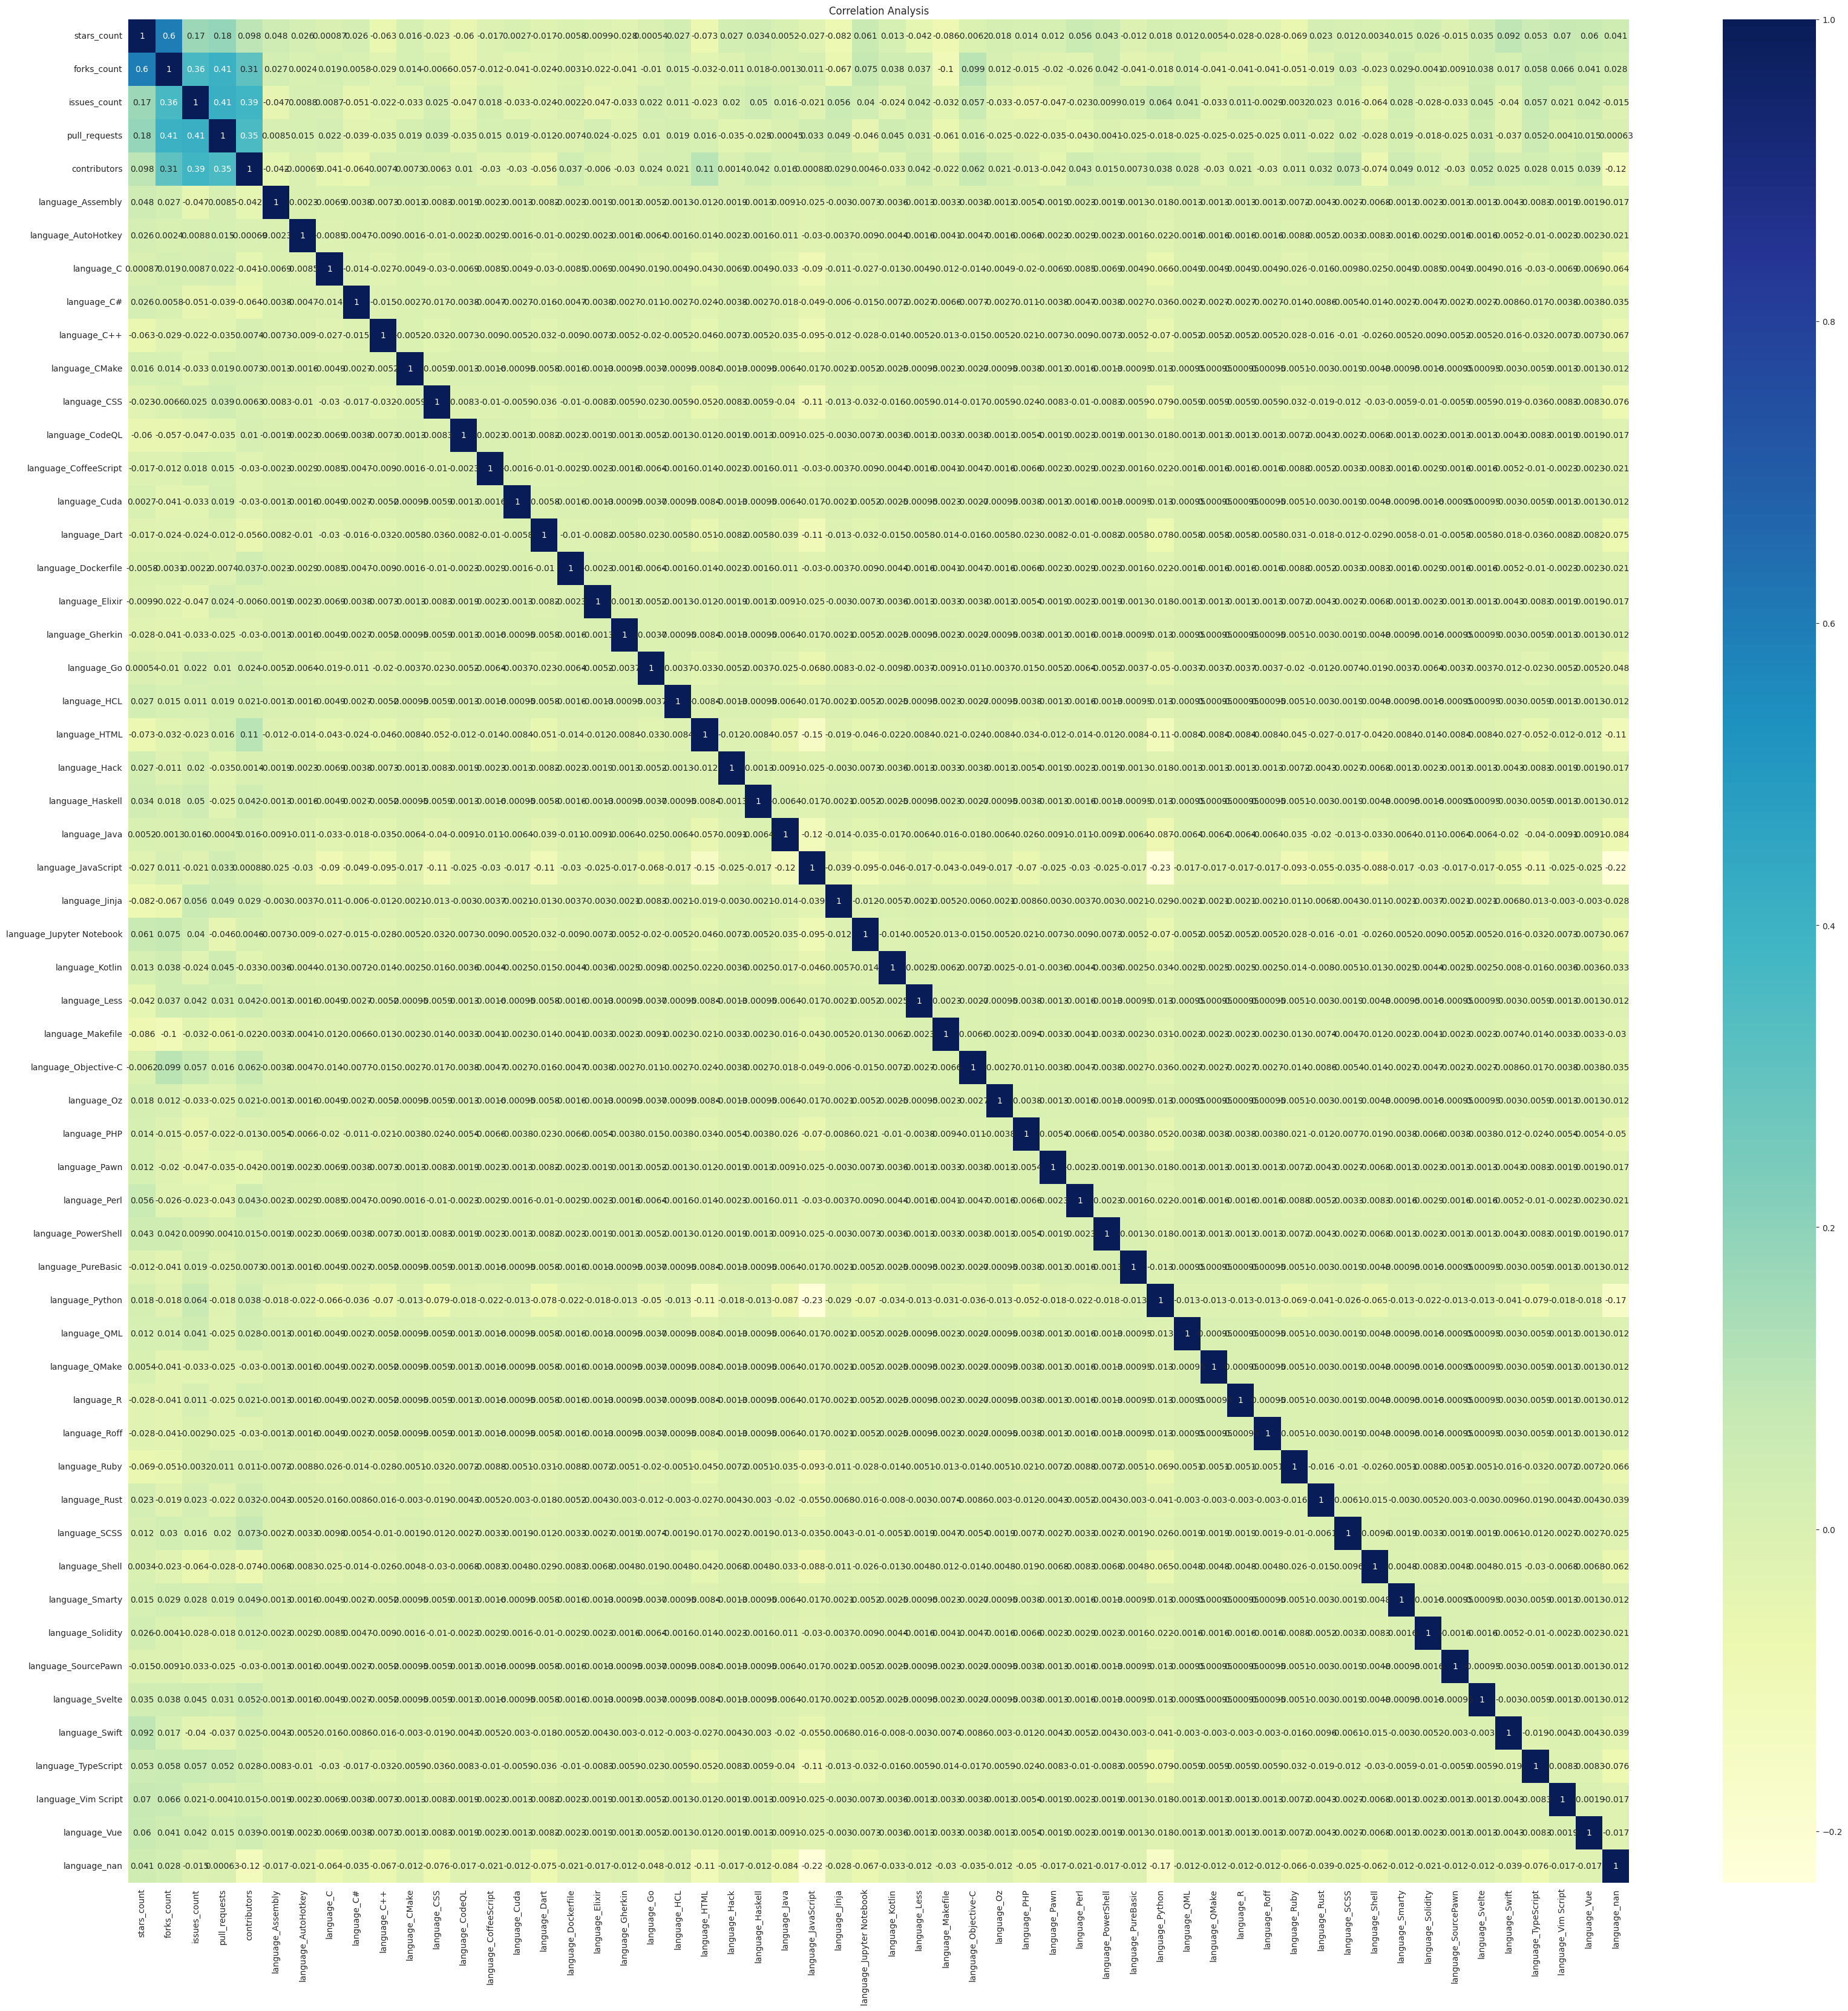

In [11]:
import copy
github_data_attr_corr = copy.deepcopy(github_data)
df_coded = pd.get_dummies(github_data_attr_corr, columns=['language'], dummy_na=True, drop_first=True)
# df_coded.head()
# df_coded.corr(method='spearman',numeric_only=True)

plt.figure(figsize=(40, 40))
sns.heatmap(df_coded.corr(method='spearman',numeric_only=True), cmap='YlGnBu', annot=True)
plt.title('Correlation Analysis')

根据热力图，其他属性并没有与language产生超过0.5的相关系数，这里采用issues_count作为相关属性进行空值填充，并展示了填充前后language属性的区别

In [14]:
github_data_attr_corr = copy.deepcopy(github_data)
df1 = github_data_attr_corr.groupby('language').agg(avg=('issues_count', 'mean'))
# df1
# df1.index
# mov_data_attr_corr = mov_data
# mov_data_attr_corr
for i in range(len(github_data_attr_corr)):
    if github_data_attr_corr.loc[i,'language'] is NA:
        rate = github_data_attr_corr.loc[i,'issues_count']
        dist = []
        for j in df1.index:
            dist.append(abs(df1.loc[j,'avg']-rate))
        idx = dist.index(min(dist))
        github_data_attr_corr.loc[i,'language'] = df1.index[idx]
github_data_attr_corr = pd.DataFrame(github_data_attr_corr['language'].value_counts()).rename(columns={'count':'repalced_attr'})
# mov_data_attr_corr=mov_data_attr_corr.to_frame()
# mov_data_attr_corr.columns.values
# mov_data_attr_corr
language_count = pd.DataFrame(github_data['language'].value_counts()).rename(columns = {'count':'original'})

language_count = language_count.sort_values(by='original',ascending=False)
# appropriate_count
# mov_data_attr_corr=mov_data_attr_corr.rename(columns={'count':'repalced_count'})
git_data_attr_corr = pd.concat([github_data_attr_corr,language_count],axis=1)

print(git_data_attr_corr)

                  repalced_attr  original
language                                 
JavaScript                  253       253
Python                      155       155
HTML                         72        72
ActionScript                 60         1
Java                         45        44
CSS                          40        37
Dart                         38        36
TypeScript                   37        37
C                            30        26
C++                          29        29
Jupyter Notebook             29        29
Ruby                         28        28
Roff                         27         1
Shell                        25        25
PHP                          16        16
Go                           16        15
HCL                          12         1
Kotlin                       11         7
Rust                         10        10
Swift                        10        10
Smarty                        9         1
SCSS                          8   

使用数据对象之间的相关性填充空值

In [52]:
git_data_sample_corr = copy.deepcopy(github_data)
git_data_sample_corr.isna().sum()
def regularit(df):
    new_df = pd.DataFrame(index=df.index)
#     columns = ['IMDb-rating', 'downloads', 'views','run_time']
    columns = ['stars_count', 'forks_count', 'issues_count','pull_requests','contributors']
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        new_df[c] = ((d - MIN) / (d - MAX))
    return new_df

normal_git_data = regularit(github_data)
normal_git_data = normal_git_data.replace(np.inf, 1000)
normal_git_data = normal_git_data.replace(-np.inf, -1000)
# normal_appropriate = pd.concat([normal_git_data, mov_data['appropriate_for']], axis=1)
normal_language = pd.concat([normal_git_data, github_data['language']], axis=1)
# normal_language
infos = []
for i in range(len(normal_language)):
    info = []
    stars = normal_language.loc[i,'stars_count']
    forks = normal_language.loc[i,'forks_count']
    issues = normal_language.loc[i,'issues_count']
    pull = normal_language.loc[i,'pull_requests']
    contributors = normal_language.loc[i,'contributors']
    info.append(stars)
    info.append(forks)
    info.append(issues)
    info.append(pull)
    info.append(contributors)
    infos.append(np.array(info))
    
len(infos)
for i in range(len(normal_language)):
    if(i%100 == 0):
        print(i)
    if normal_language.loc[i,'language'] is NA:
        dists = []
        for j in range(len(infos)):
            dist = np.linalg.norm(infos[i] - infos[j])
#                 if ((infos[i][k] is not NA) and (infos[j][k] is not NA)):
#             dist = np.sqrt(np.sum(np.square(infos[i] - infos[j])))
            dists.append(dist)
#         print(dists)
        idx = 0
        while(True):
            idx = dists.index(min(dists))
            if(git_data_sample_corr.loc[idx,'language'] is not NA):
                break
            else:
                dists.remove(min(dists))
#         print(type(git_data_sample_corr.loc[idx,'language']))
        git_data_sample_corr.loc[i,'language'] = git_data_sample_corr.loc[idx,'language']
# git_data_sample_corr['language'].value_counts()
# git_data_sample_corr.isna().sum()
language_count = pd.DataFrame(github_data['language'].value_counts()).sort_values(by='count',ascending=False).rename(columns={'count':'original'})
git_data_sample_corr = pd.DataFrame(git_data_sample_corr['language'].value_counts()).sort_values(by='count',ascending=False).rename(columns={'count':'cor_replaced'})
# git_data_sample_corr
git_data_sample_corr = pd.concat([language_count,git_data_sample_corr],axis=1)
print(git_data_sample_corr)

0
100
200
300
400
500
600
700
800
900
1000
                  original  cor_replaced
language                                
JavaScript             253           287
Python                 155           170
HTML                    72            81
Java                    44            57
CSS                     37            45
TypeScript              37            47
Dart                    36            40
C++                     29            34
Jupyter Notebook        29            45
Ruby                    28            30
C                       26            31
Shell                   25            32
PHP                     16            17
Go                      15            15
Rust                    10            11
Swift                   10            14
C#                       8             8
Objective-C              8            10
Kotlin                   7             7
Makefile                 6             6
Jinja                    5             5
SCSS          